In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# ในตัวอย่างนี้จะทำการสร้างชุดข้อมูลฝึกฝนด้วย method make_blobs ของ scikit-learn 
# ซึ่งจะทำการสร้างชุดข้อมูลที่มีลักษณะการกระจายตัวเเบบ การแจกแจงแบบปรกติหลายตัวแปร (multivariate normal distribution)

In [5]:
from sklearn.datasets import make_blobs
X,y = make_blobs(1000, 2, centers=2, random_state=2, cluster_std=2.5)

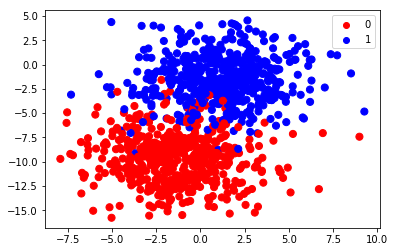

In [6]:
# ทดลองพล็อตผลที่ได้จากการสร้างชุดข้อมูล
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

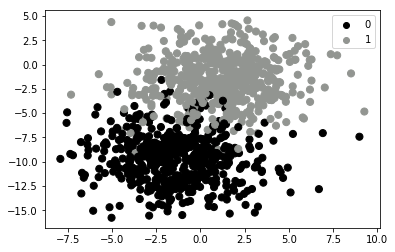

In [7]:
colors=np.array(["#000000", "#929591"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend();

In [8]:
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,1.606105,-5.178423,1
1,-1.226950,-7.204182,0
2,-0.244843,-12.038946,0
3,0.005917,-0.720965,1
4,3.817871,-1.587949,1


In [9]:
# ทดลองเเสดงตัวอย่างข้อมูลเพื่อตรวจสอบข้อมูล
# สร้างแบบจำลองการเรียนรู้โดยใช้วิธี Naive Bayes Classifier
# นำเข้าคลาสของ GaussianNB เเละ train_test_split จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [10]:
test_size=.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=7)

In [11]:
# สร้างแบบจำลอง Naive Bayes Classifier โดย
model=GaussianNB()
model.fit(X_train, y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
# ทดลองดูค่าผิดพลาดของแบบจำลองที่สร้างขึ้นโดยใช้ค่า  R2
model.score(X_train, y_train)

0.96

In [13]:
model.score(X_test, y_test)

0.9533333333333334

In [14]:
# ทดสอบประสิทธิภาพแบบจำลองด้วย cross validation
from sklearn.model_selection import cross_val_score

In [15]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.960 (0.019)


In [16]:
# เเสดงค่าเฉลี่ยเเละค่าเบี่ยงเบนมาตรฐานของประสิทธิภาพ
from numpy import mean, std
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.960 (0.019)


In [17]:
# ทดลองเเสดงผลการทำนายค่าด้วยแบบจำลองที่สร้างขึ้น
predicted = model.predict(X_test)

In [18]:
# ทดลองเเสดงผลที่แบบจำลองทำนายผิดพลาด
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
9,1,0
28,0,1
29,0,1
36,1,0
67,1,0
81,1,0
124,1,0
158,1,0
201,0,1
212,0,1


In [19]:
# ตัวอย่างการใช้ Naive Bayes Classifer เเยกประเภทข้อมูลโดยใช้หลายคุณลักษณะ
df = pd.read_csv('https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/Data%20Change.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,0,22,0,Healthcare,1,0,4,Cat_4,D
1,462643,Female,1,38,1,Engineer,1,1,3,Cat_4,A
2,466315,Female,1,67,1,Engineer,1,0,1,Cat_6,B
3,461735,Male,1,67,1,Lawyer,0,2,2,Cat_6,B
4,462669,Female,1,40,1,Entertainment,1,2,6,Cat_6,A


In [20]:
# เเบ่งข้อมูลสำหรับเรียนรู้เเละทดสอบ โดย
X_train, X_test, y_train, y_test = train_test_split(
    df[["Age"]], 
    df[["Spending_Score"]], 
    test_size=test_size, random_state=7)

In [21]:
#สร้างแบบจำลอง
model.fit(X_train, y_train) 

C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
# ทดสอบประสิทธิภาพแบบจำลองด้วย cross validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.616 (0.006)


C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d

In [23]:
#ทดสอบทำนายผล
predicted = model.predict(X_test)

In [24]:
# ทดลองเเสดงประสิทธิภาพ
y_test

,Spending_Score
4179,0
7439,1
1617,1
3676,1
4115,1
3666,0
4432,1
6017,2
1524,2
6276,1


In [25]:
predicted

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.precision_score(y_test, predicted, average='micro'))
print(metrics.recall_score(y_test, predicted, average='micro'))

0.6009913258983891
0.6009913258983891
0.6009913258983891


In [27]:
# แสดงประสิทธิภาพของเเบบจำลอง
from sklearn import metrics
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74      1455
           1       0.00      0.00      0.00       626
           2       0.44      0.37      0.40       340

   micro avg       0.60      0.60      0.60      2421
   macro avg       0.35      0.43      0.38      2421
weighted avg       0.44      0.60      0.50      2421



C:\Users\Anwa\Downloads\machine\Newfolder\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
